<a href="https://colab.research.google.com/github/Akhil9037/GRAVITATIONAL-waves-/blob/program/Gravitational_Waveform_Analysis_and_Match_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

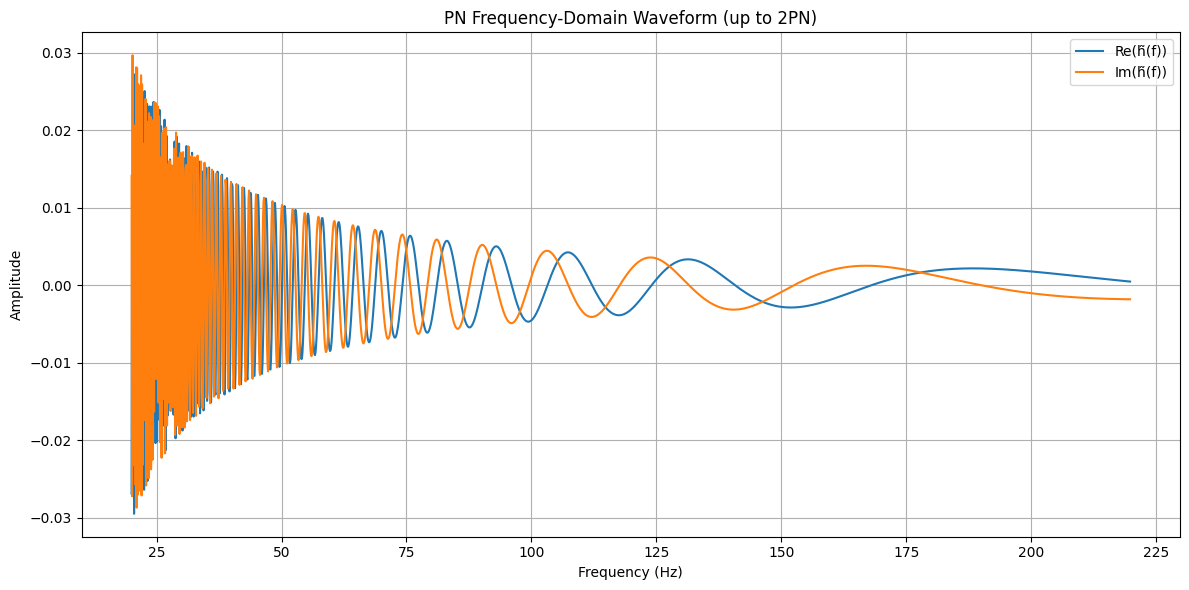

In [ ]:
#_------_-------------------- For Pn approximation
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------------------------------------
# Constants and binary parameters (geometrized units: G = c = 1)
m1 = 10  # solar masses
m2 = 10  # solar masses
M = m1 + m2
eta = m1 * m2 / M**2  # symmetric mass ratio
#-----------------------------------------------------------------------
# Conversion factor: solar mass to seconds (G = c = 1 units)
M_sec = M * 4.925491025543576e-6  # seconds
#-----------------------------------------------------------------------
# Frequency range (Hz)
f_min = 20.0
f_max = 1/((6**(3/2))*np.pi*M_sec)  #512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)
#_----------------------------------------------------------------------
# Characteristic velocity v = (π M f)^(1/3)
v = (np.pi * M_sec * frequencies) ** (1/3)
#-----------------------------------------------------------------------
# PN phase coefficients (up to 2PN, α₀ to α₄)
alpha = np.zeros(8)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)
#-----------------------------------------------------------------------
# Time and phase at coalescence (set to 0 for plotting)
tc = 0
phi_c = 0
#-----------------------------------------------------------------------
# Compute PN phase ψ(f)
v_powers = np.array([v**k for k in range(5)])  # v^0 to v^4
sum_alpha_vk = np.tensordot(alpha[:5], v_powers, axes=1)
psi_f = 2*np.pi*frequencies*tc - phi_c - np.pi/4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk
#-----------------------------------------------------------------------
# Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)
#-----------------------------------------------------------------------
# Complex waveform in frequency domain: h̃(f) = A(f) * exp(iψ(f))
h_f = A_f * np.exp(1j * psi_f)
#-----------------------------------------------------------------------
# Plot real and imaginary parts of h̃(f)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re(h̃(f))')
plt.plot(frequencies, np.imag(h_f), label='Im(h̃(f))')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PN Frequency-Domain Waveform (up to 2PN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━

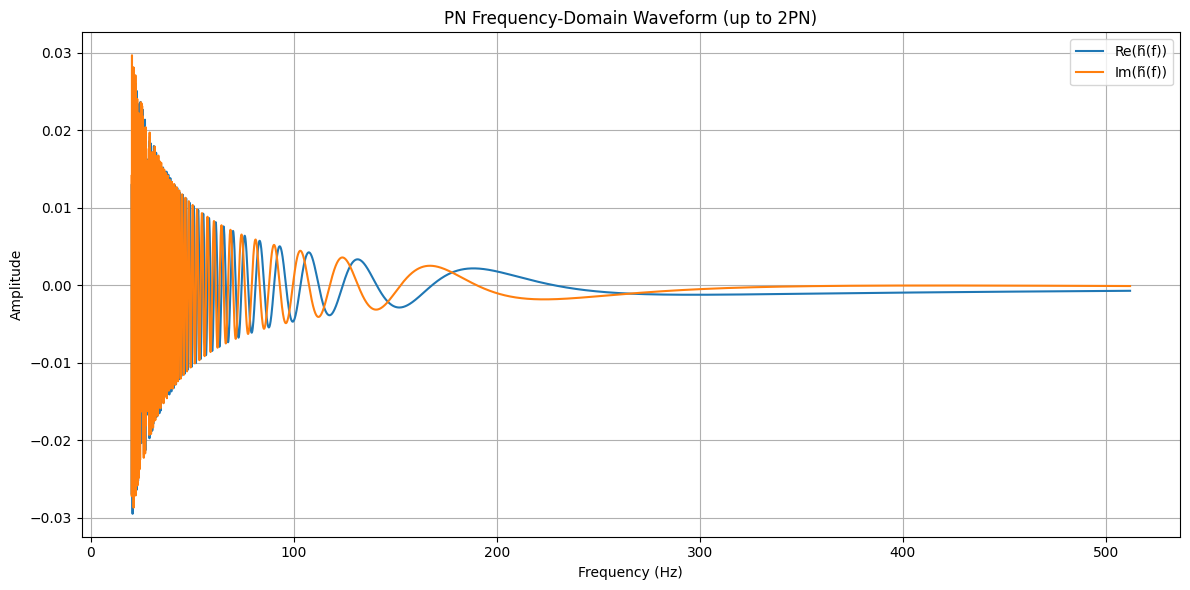

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Binary parameters
m1 = 10  # Solar masses
m2 = 10
M = m1 + m2
eta = m1 * m2 / M**2  # Symmetric mass ratio

# Convert total mass to seconds (geometric units: G = c = 1)
M_sec = M * 4.925491025543576e-6  # seconds

# Frequency range
f_min = 20.0  # Hz
f_max = 512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)

# Characteristic velocity v = (π M f)^(1/3)
v = (np.pi * M_sec * frequencies) ** (1/3)

# PN phase coefficients up to 2PN
alpha = np.zeros(8)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

# Coalescence time and phase
tc = 0
phi_c = 0

# Compute PN phase ψ(f)
v_powers = np.array([v**k for k in range(5)])  # v^0 to v^4
sum_alpha_vk = np.tensordot(alpha[:5], v_powers, axes=1)
psi_f = 2 * np.pi * frequencies * tc - phi_c - np.pi/4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk

# Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)

# Frequency-domain waveform h̃(f) = A(f) * exp(iψ(f))
h_f = A_f * np.exp(1j * psi_f)

# Plot real and imaginary parts of h̃(f)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re(h̃(f))')
plt.plot(frequencies, np.imag(h_f), label='Im(h̃(f))')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PN Frequency-Domain Waveform (up to 2PN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

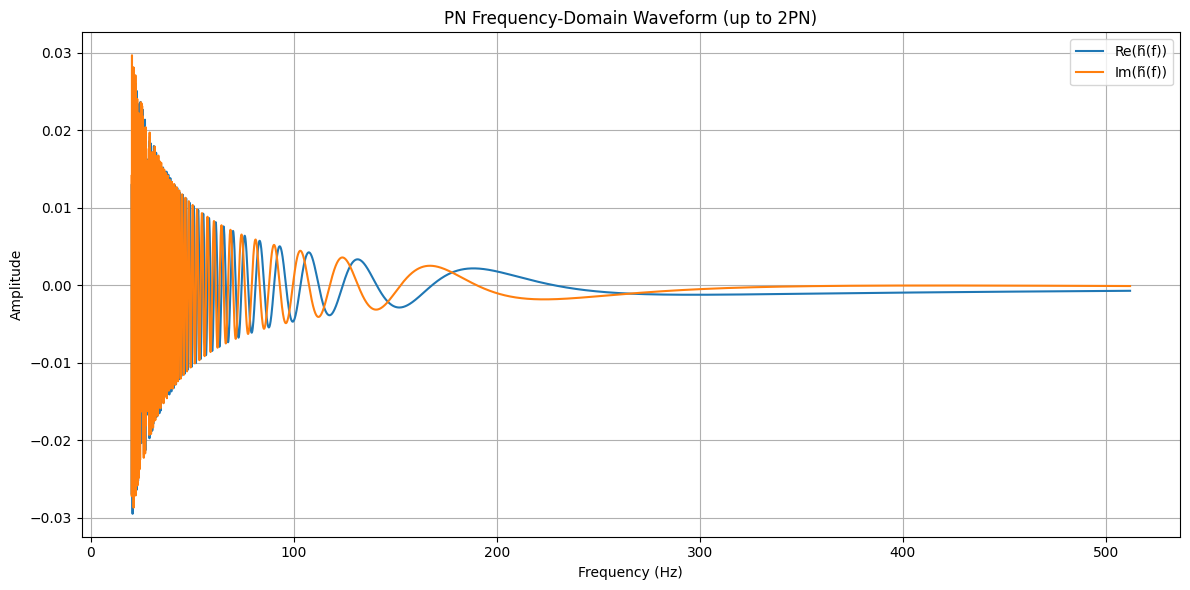

Match value between custom waveform and PyCBC template: 0.093379


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.types import FrequencySeries
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.waveform import get_fd_waveform
from pycbc.filter import match

# ----- Task 1: Generate Frequency-Domain PN Waveform -----

# Binary parameters
m1 = 10  # in solar masses
m2 = 10
M = m1 + m2
eta = m1 * m2 / M**2  # symmetric mass ratio

# Geometric unit conversion: M_solar to seconds
M_sec = M * 4.925491025543576e-6  # total mass in seconds

# Frequency range
f_min = 20.0
f_max = 512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)

# Characteristic velocity
v = (np.pi * M_sec * frequencies) ** (1/3)

# PN phase coefficients (up to 2PN)
alpha = np.zeros(8)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

# Coalescence time and phase
tc = 0
phi_c = 0

# Phase ψ(f)
v_powers = np.array([v**k for k in range(5)])  # v^0 to v^4
sum_alpha_vk = np.tensordot(alpha[:5], v_powers, axes=1)
psi_f = 2*np.pi*frequencies*tc - phi_c - np.pi/4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk

# Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)

# Frequency-domain waveform h̃(f)
h_f = A_f * np.exp(1j * psi_f)

# Plot waveform
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re(h̃(f))')
plt.plot(frequencies, np.imag(h_f), label='Im(h̃(f))')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PN Frequency-Domain Waveform (up to 2PN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Task 2: Match Against PyCBC Template -----

# Convert to PyCBC FrequencySeries
h_f_series = FrequencySeries(h_f, delta_f=delta_f)

# Generate TaylorF2 template from PyCBC
hp, _ = get_fd_waveform(approximant="TaylorF2",
                        mass1=m1, mass2=m2,
                        delta_f=delta_f,
                        f_lower=f_min,
                        f_final=f_max)

# Match length with our waveform
min_len = min(len(h_f_series), len(hp))
h_f_series = h_f_series[:min_len]
hp = hp[:min_len]

# Create PSD
psd = aLIGOZeroDetHighPower(len(h_f_series), delta_f, f_min)
psd = psd[:min_len]

# Calculate match
match_value, _ = match(h_f_series, hp, psd=psd,
                       low_frequency_cutoff=f_min,
                       high_frequency_cutoff=f_max)

print(f"Match value between custom waveform and PyCBC template: {match_value:.6f}")

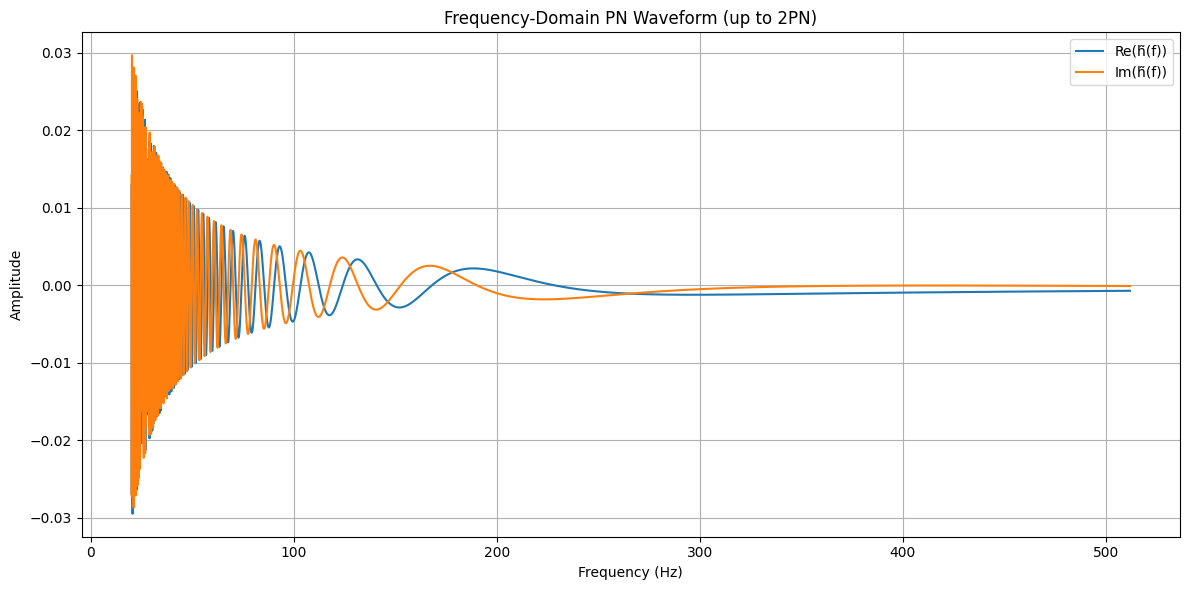

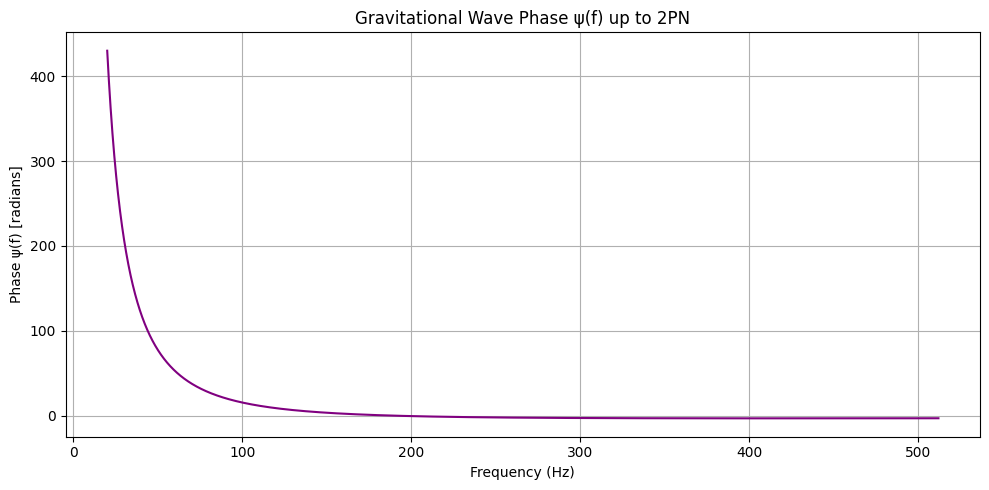

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress SWIGLAL warning if PyCBC is used later
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

# Binary system parameters
m1 = 10  # solar masses
m2 = 10
M = m1 + m2
eta = m1 * m2 / M**2  # symmetric mass ratio

# Convert mass to seconds (geometric units: G = c = 1)
M_sec = M * 4.925491025543576e-6

# Frequency range (Hz)
f_min = 20.0
f_max = 512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)

# Characteristic velocity v = (π M f)^(1/3)
v = (np.pi * M_sec * frequencies) ** (1/3)

# Phase coefficients up to 2PN
alpha = np.zeros(8)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

# Time and phase of coalescence (set to 0 for simplicity)
tc = 0
phi_c = 0

# Compute PN phase ψ(f)
v_powers = np.array([v**k for k in range(5)])  # v^0 to v^4
sum_alpha_vk = np.tensordot(alpha[:5], v_powers, axes=1)
psi_f = 2 * np.pi * frequencies * tc - phi_c - np.pi / 4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk

# Compute Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)

# Compute full frequency-domain waveform h̃(f) = A(f) * exp(iψ(f))
h_f = A_f * np.exp(1j * psi_f)

# Plot 1: Real and imaginary parts of the waveform
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re(h̃(f))')
plt.plot(frequencies, np.imag(h_f), label='Im(h̃(f))')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency-Domain PN Waveform (up to 2PN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Phase ψ(f) in radians
plt.figure(figsize=(10, 5))
plt.plot(frequencies, psi_f, label='ψ(f)', color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase ψ(f) [radians]')
plt.title('Gravitational Wave Phase ψ(f) up to 2PN')
plt.grid(True)
plt.tight_layout()
plt.show()


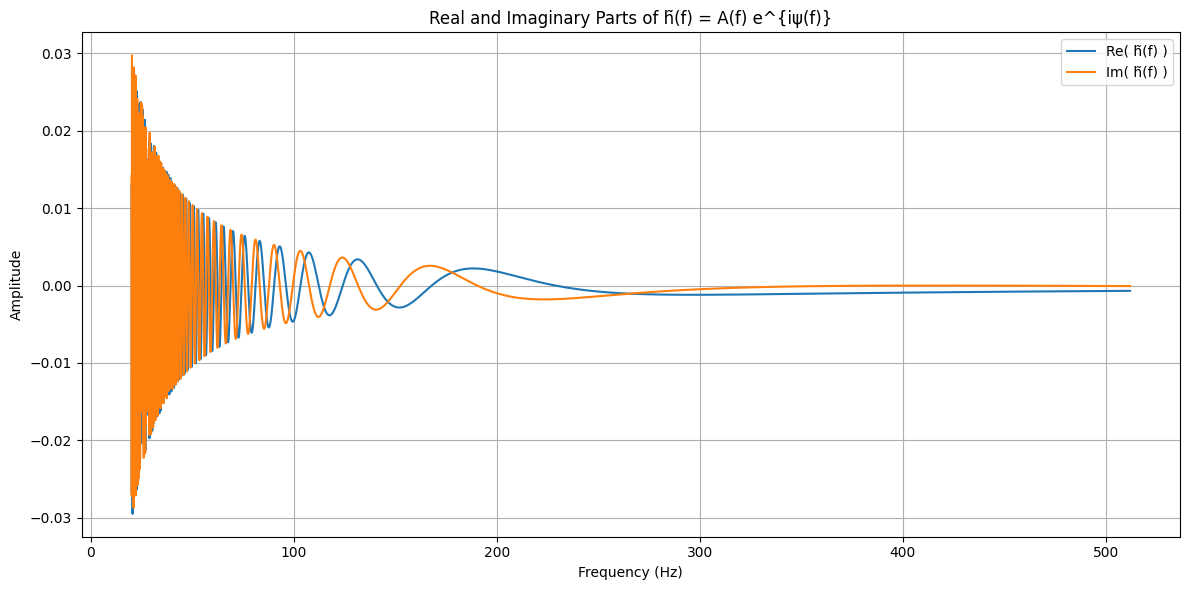

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Binary parameters
m1 = 10  # solar masses
m2 = 10
M = m1 + m2
eta = m1 * m2 / M**2  # symmetric mass ratio

# Geometric unit conversion: solar mass to seconds
M_sec = M * 4.925491025543576e-6  # seconds

# Frequency array
f_min = 20.0
f_max = 512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)

# v = (π M f)^(1/3)
v = (np.pi * M_sec * frequencies) ** (1/3)

# Phase coefficients α₀ to α₄ (2PN)
alpha = np.zeros(8)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

# Coalescence time and phase
tc = 0
phi_c = 0

# Phase ψ(f)
v_powers = np.array([v**k for k in range(5)])  # v^0 to v^4
sum_alpha_vk = np.tensordot(alpha[:5], v_powers, axes=1)
psi_f = 2 * np.pi * frequencies * tc - phi_c - np.pi / 4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk

# Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)

# Complex waveform: h̃(f) = A(f) * exp(iψ(f))
h_f = A_f * np.exp(1j * psi_f)

# Plot real and imaginary parts of h̃(f)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re( h̃(f) )')
plt.plot(frequencies, np.imag(h_f), label='Im( h̃(f) )')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Real and Imaginary Parts of h̃(f) = A(f) e^{iψ(f)}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


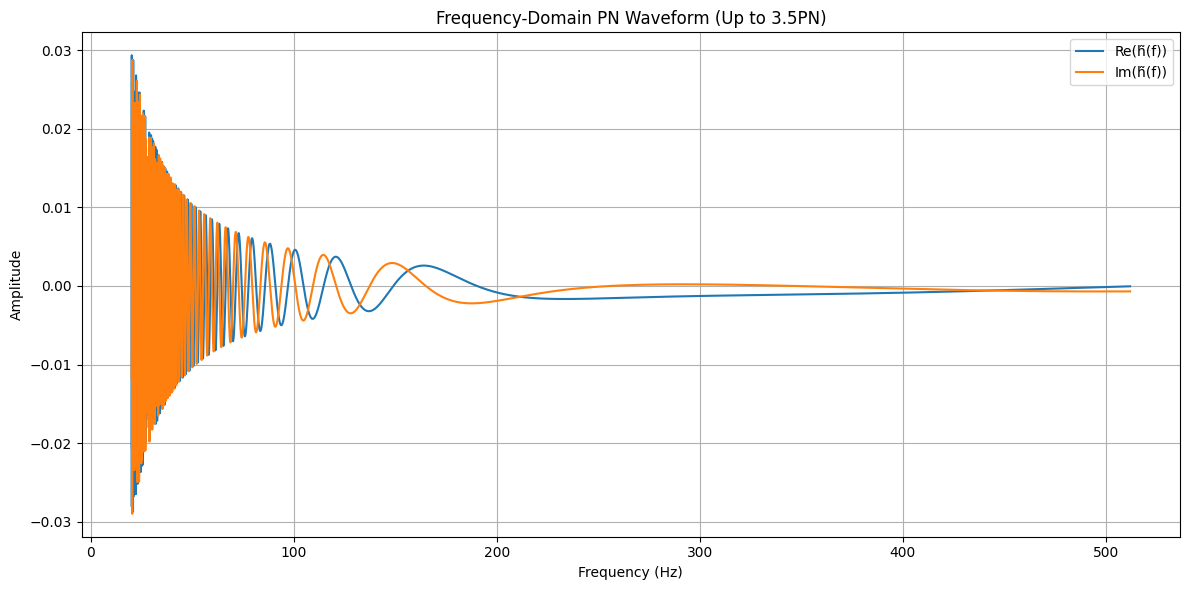

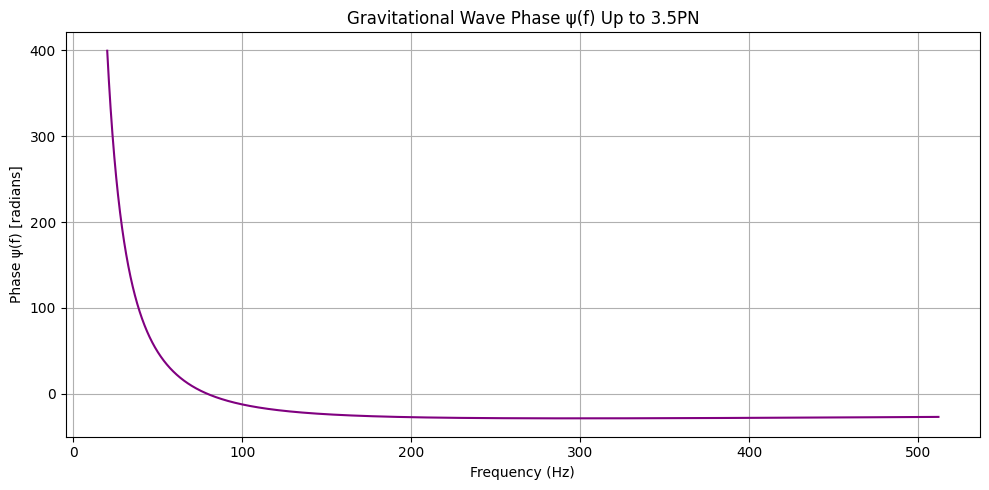

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Binary parameters
m1 = 10  # solar masses
m2 = 10
M = m1 + m2
eta = m1 * m2 / M**2  # symmetric mass ratio

# Convert to geometric units (M_solar to seconds)
M_sec = M * 4.925491025543576e-6

# Frequency range
f_min = 20.0
f_max = 512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)

# v = (π M f)^(1/3)
v = (np.pi * M_sec * frequencies) ** (1/3)
logv = np.log(v)

# Coalescence time and phase
tc = 0
phi_c = 0

# Known constants
gamma_E = 0.5772156649
lambda_val = -0.6451
theta_val = -1.28

# Phase coefficients (scalar, up to α₄)
alpha = np.zeros(5)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

# Build sum Σ α_k v^k for k = 0 to 4
sum_alpha_vk = sum(alpha[k] * v**k for k in range(5))

# Add α₅ term (1.5PN with log)
sum_alpha_vk += np.pi * (38645/756 - 65/9 * eta) * v**5 * np.log(v)

# Add α₆ term (3PN with log, gamma_E)
sum_alpha_vk += v**6 * (
    11583231236531/4694215680
    - 640 * np.pi**2 / 3
    - 6848 * gamma_E / 21
    + eta * (-15737765635/3048192 + 2255 * np.pi**2 / 12)
    + (76055 / 1728) * eta**2
    - (127825 / 1296) * eta**3
    - (6848 / 21) * np.log(4 * v)
)

# Add α₇ term (3.5PN)
sum_alpha_vk += np.pi * v**7 * (
    77096675 / 254016 + 378515 / 1512 * eta - 74045 / 756 * eta**2
)

# Full phase ψ(f)
psi_f = 2 * np.pi * frequencies * tc - phi_c - np.pi / 4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk

# Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)

# Frequency-domain waveform: h̃(f) = A(f) * exp(iψ(f))
h_f = A_f * np.exp(1j * psi_f)

# Plot 1: Real and imaginary parts of h̃(f)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re(h̃(f))')
plt.plot(frequencies, np.imag(h_f), label='Im(h̃(f))')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency-Domain PN Waveform (Up to 3.5PN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Phase ψ(f)
plt.figure(figsize=(10, 5))
plt.plot(frequencies, psi_f, color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase ψ(f) [radians]')
plt.title('Gravitational Wave Phase ψ(f) Up to 3.5PN')
plt.grid(True)
plt.tight_layout()
plt.show()

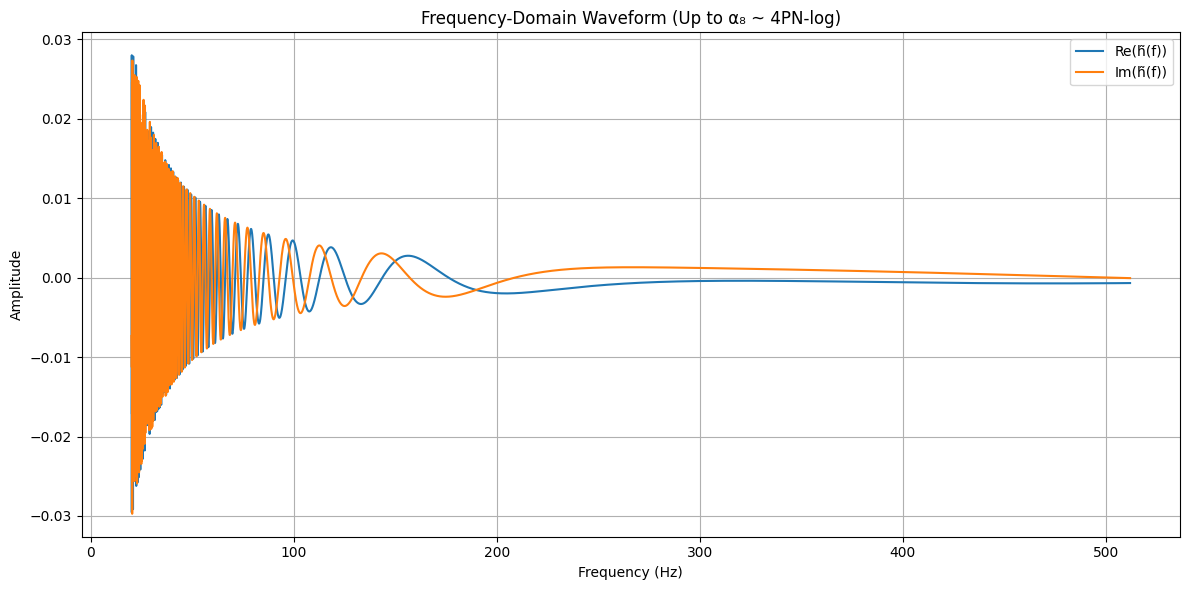

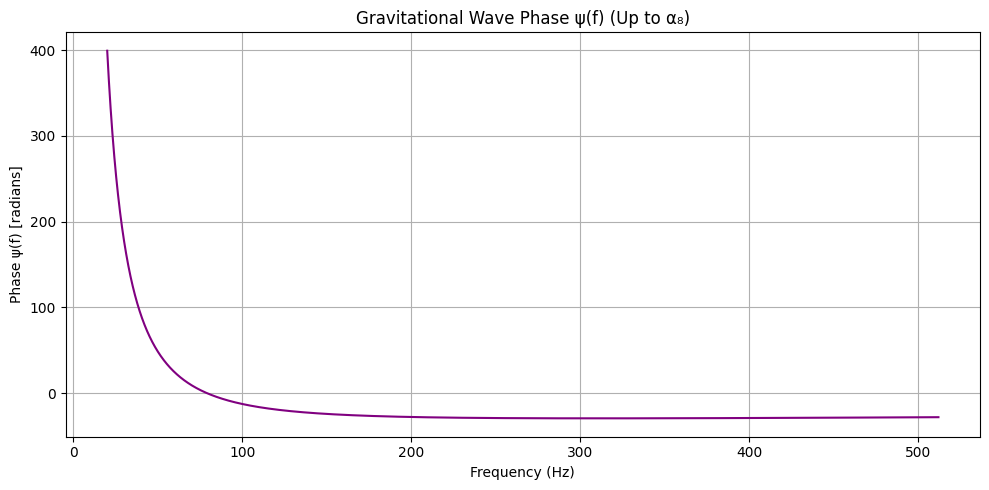

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Binary parameters
m1 = 10  # solar masses
m2 = 10
M = m1 + m2
eta = m1 * m2 / M**2

# Convert to seconds (G = c = 1)
M_sec = M * 4.925491025543576e-6

# Frequency range
f_min = 20.0
f_max = 512.0
delta_f = 0.1
frequencies = np.arange(f_min, f_max, delta_f)

# Velocity and log(v)
v = (np.pi * M_sec * frequencies) ** (1/3)
logv = np.log(v)

# Coalescence time and phase
tc = 0
phi_c = 0

# Constants
gamma_E = 0.5772156649
lambda_val = -0.6451
theta_val = -1.28

# PN coefficients α₀ to α₄ (polynomial only)
alpha = np.zeros(5)
alpha[0] = 1
alpha[1] = 0
alpha[2] = (20/9) * (743/336 + 11/4 * eta)
alpha[3] = -16 * np.pi
alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

# Build Σ α₀ to α₄ terms
sum_alpha_vk = sum(alpha[k] * v**k for k in range(5))

# Add α₅ (2.5PN)
sum_alpha_vk += np.pi * (38645/756 - 65/9 * eta) * v**5 * logv

# Add α₆ (3PN)
sum_alpha_vk += v**6 * (
    11583231236531/4694215680
    - 640 * np.pi**2 / 3
    - 6848 * gamma_E / 21
    + eta * (-15737765635/3048192 + 2255 * np.pi**2 / 12)
    + (76055 / 1728) * eta**2
    - (127825 / 1296) * eta**3
    - (6848 / 21) * np.log(4 * v)
)

# Add α₇ (3.5PN)
sum_alpha_vk += np.pi * v**7 * (
    77096675 / 254016 + 378515 / 1512 * eta - 74045 / 756 * eta**2
)

# Add α₈ (4PN log term only)
alpha8_log = np.pi * (38645/756 - 65/9 * eta)
sum_alpha_vk += alpha8_log * v**8 * logv

# Final PN phase ψ(f)
psi_f = 2 * np.pi * frequencies * tc - phi_c - np.pi / 4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk

# Amplitude A(f) ∝ f^(-7/6)
A_f = frequencies ** (-7/6)

# Frequency-domain waveform
h_f = A_f * np.exp(1j * psi_f)

# Plot waveform
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(h_f), label='Re(h̃(f))')
plt.plot(frequencies, np.imag(h_f), label='Im(h̃(f))')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency-Domain Waveform (Up to α₈ ~ 4PN-log)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot phase ψ(f)
plt.figure(figsize=(10, 5))
plt.plot(frequencies, psi_f, color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase ψ(f) [radians]')
plt.title('Gravitational Wave Phase ψ(f) (Up to α₈)')
plt.grid(True)
plt.tight_layout()
plt.show()


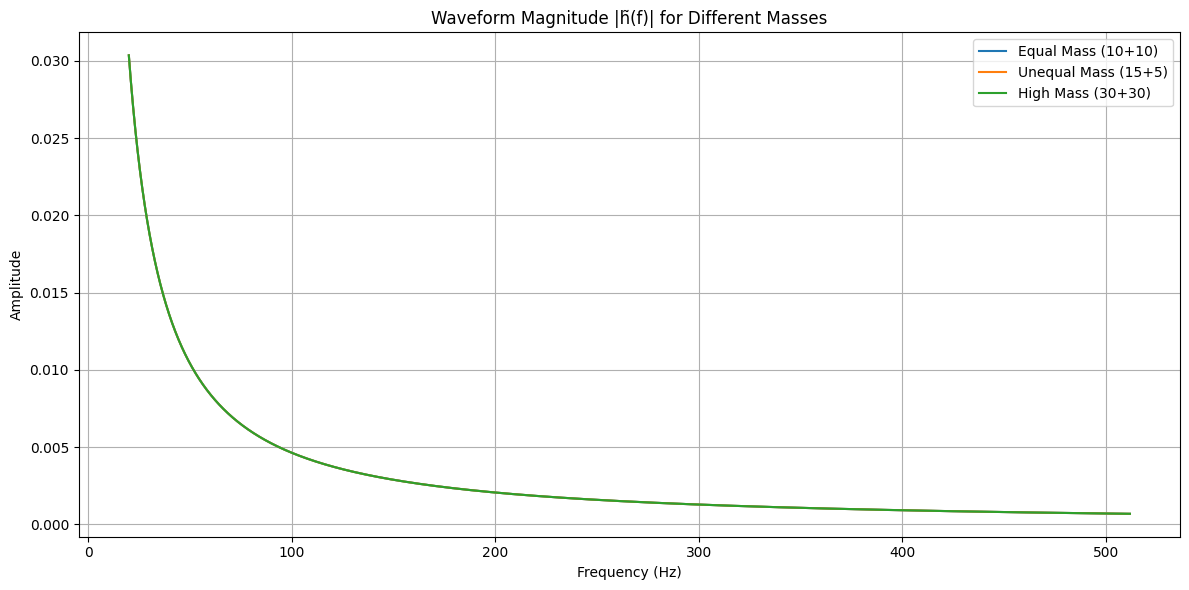

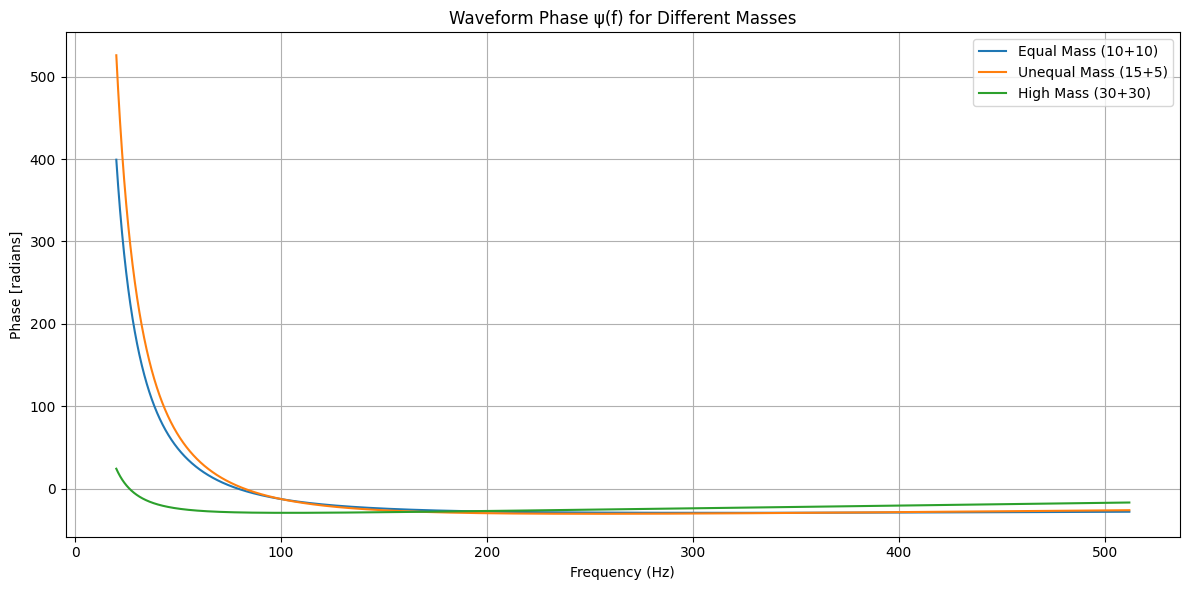

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_waveform(m1, m2, f_min=20.0, f_max=512.0, delta_f=0.1):
    M = m1 + m2
    eta = m1 * m2 / M**2
    M_sec = M * 4.925491025543576e-6  # Convert to seconds

    frequencies = np.arange(f_min, f_max, delta_f)
    v = (np.pi * M_sec * frequencies) ** (1/3)
    logv = np.log(v)

    gamma_E = 0.5772156649

    alpha = np.zeros(5)
    alpha[0] = 1
    alpha[1] = 0
    alpha[2] = (20/9) * (743/336 + 11/4 * eta)
    alpha[3] = -16 * np.pi
    alpha[4] = 10 * (3058673/1016064 + 5429/1008 * eta + 617/144 * eta**2)

    sum_alpha_vk = sum(alpha[k] * v**k for k in range(5))

    sum_alpha_vk += np.pi * (38645/756 - 65/9 * eta) * v**5 * logv

    sum_alpha_vk += v**6 * (
        11583231236531/4694215680
        - 640 * np.pi**2 / 3
        - 6848 * gamma_E / 21
        + eta * (-15737765635/3048192 + 2255 * np.pi**2 / 12)
        + (76055 / 1728) * eta**2
        - (127825 / 1296) * eta**3
        - (6848 / 21) * np.log(4 * v)
    )

    sum_alpha_vk += np.pi * v**7 * (
        77096675 / 254016 + 378515 / 1512 * eta - 74045 / 756 * eta**2
    )

    alpha8_log = np.pi * (38645/756 - 65/9 * eta)
    sum_alpha_vk += alpha8_log * v**8 * logv

    psi_f = -np.pi/4 + (3 / (128 * eta)) * v**(-5) * sum_alpha_vk
    A_f = frequencies ** (-7/6)
    h_f = A_f * np.exp(1j * psi_f)
    return frequencies, h_f, psi_f

# Binary cases
binaries = {
    "Equal Mass (10+10)": (10, 10),
    "Unequal Mass (15+5)": (15, 5),
    "High Mass (30+30)": (30, 30)
}

# Plot amplitude spectra
plt.figure(figsize=(12, 6))
for label, (m1, m2) in binaries.items():
    f, h, _ = compute_waveform(m1, m2)
    plt.plot(f, np.abs(h), label=label)
plt.title("Waveform Magnitude |h̃(f)| for Different Masses")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot phase spectra
plt.figure(figsize=(12, 6))
for label, (m1, m2) in binaries.items():
    f, _, psi = compute_waveform(m1, m2)
    plt.plot(f, psi, label=label)
plt.title("Waveform Phase ψ(f) for Different Masses")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase [radians]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


XLAL Error - SEOBNRv4ROMTimeFrequencySetup (LALSimIMRSEOBNRv4ROM.c:1332): Error setting up SEOBNRv4ROM data - check your $LAL_DATA_PATH

XLAL Error - SEOBNRv4ROMTimeFrequencySetup (LALSimIMRSEOBNRv4ROM.c:1332): Generic failure
XLAL Error - XLALSimIMRSEOBNRv4ROMTimeOfFrequency (LALSimIMRSEOBNRv4ROM.c:1483): Internal function call failed: Generic failure


Approximant SEOBNRv4 failed: Internal function call failed: Generic failure


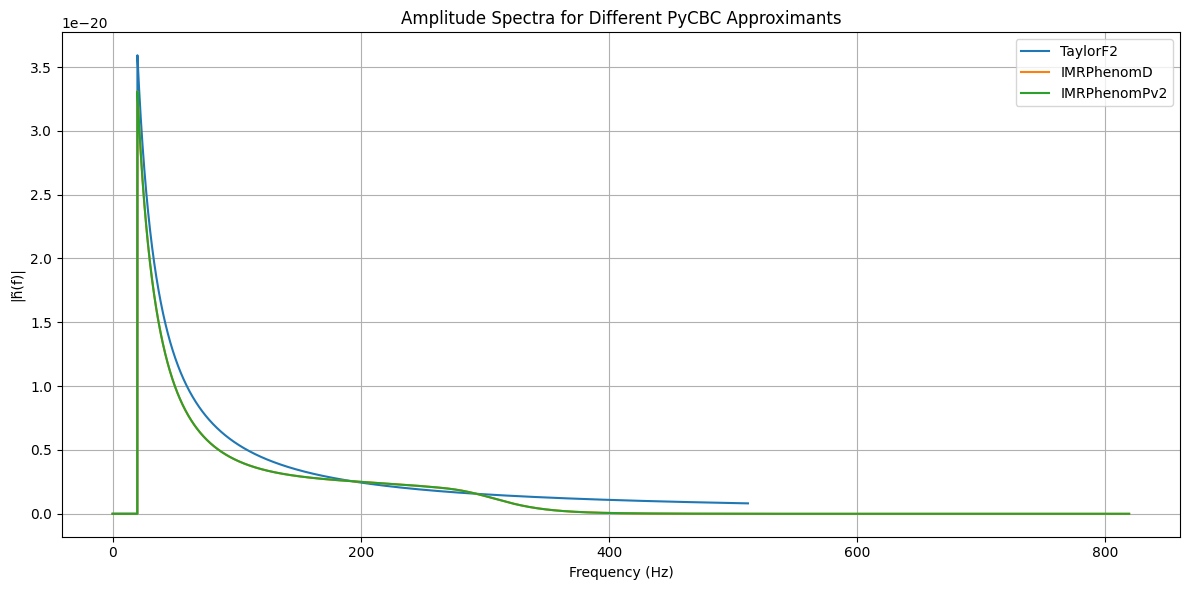

In [ ]:
from pycbc.waveform import get_fd_waveform
import matplotlib.pyplot as plt

# Parameters
m1 = 30
m2 = 30
f_min = 20
f_max = 512
delta_f = 0.1

approximants = [
    "TaylorF2",       # PN frequency-domain
    "SEOBNRv4",       # EOB full waveform
    "IMRPhenomD",     # Phenomenological IMR
    "IMRPhenomPv2"    # Precessing
]

# Generate and plot amplitude spectra
plt.figure(figsize=(12, 6))
for approx in approximants:
    try:
        hp, _ = get_fd_waveform(approximant=approx,
                                mass1=m1, mass2=m2,
                                delta_f=delta_f,
                                f_lower=f_min,
                                f_final=f_max)
        freqs = hp.sample_frequencies
        plt.plot(freqs, abs(hp), label=approx)
    except Exception as e:
        print(f"Approximant {approx} failed: {e}")

plt.title("Amplitude Spectra for Different PyCBC Approximants")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|h̃(f)|")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:383: RuntimeWarning: invalid value encountered in divide
  return self._data / other
XLAL Error - SEOBNRv4ROMTimeFrequencySetup (LALSimIMRSEOBNRv4ROM.c:1332): Error setting up SEOBNRv4ROM data - check your $LAL_DATA_PATH

XLAL Error - SEOBNRv4ROMTimeFrequencySetup (LALSimIMRSEOBNRv4ROM.c:1332): Generic failure
XLAL Error - XLALSimIMRSEOBNRv4ROMTimeOfFrequency (LALSimIMRSEOBNRv4ROM.c:1483): Internal function call failed: Generic failure


Approximant SEOBNRv4 failed: Internal function call failed: Generic failure


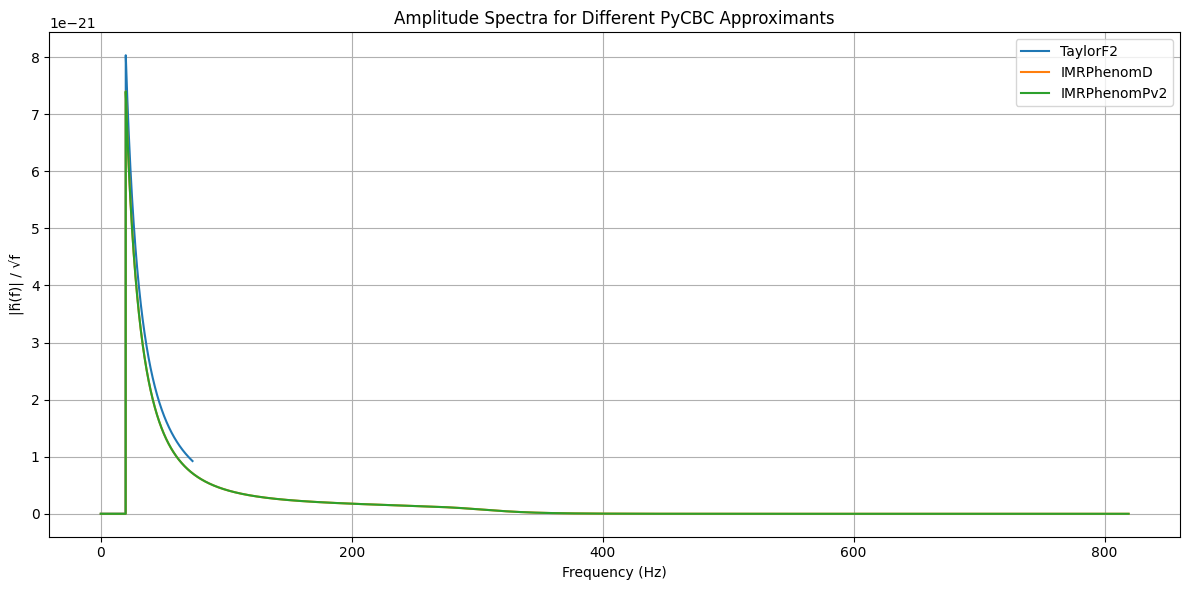

In [ ]:
from pycbc.waveform import get_fd_waveform
import matplotlib.pyplot as plt

# Parameters
m1 = 30
m2 = 30
f_min = 20
f_max = 512
delta_f = 0.1

approximants = [
    "TaylorF2",       # PN frequency-domain
    "SEOBNRv4",       # EOB full waveform
    "IMRPhenomD",     # Phenomenological IMR
    "IMRPhenomPv2"    # Precessing
]

# Generate and plot amplitude spectra
plt.figure(figsize=(12, 6))
for approx in approximants:
    try:
        hp, _ = get_fd_waveform(approximant=approx,
                                mass1=m1, mass2=m2,
                                delta_f=delta_f,
                                f_lower=f_min,
                                f_upper=f_max)
        freqs = hp.sample_frequencies
        # Plot the amplitude spectral density (magnitude of Fourier transform)
        plt.plot(freqs, abs(hp) / (freqs**0.5), label=approx)
    except Exception as e:
        print(f"Approximant {approx} failed: {e}")

plt.title("Amplitude Spectra for Different PyCBC Approximants")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|h̃(f)| / √f")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc.noise import noise_from_psd
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.filter import matched_filter

# --- Waveform and Simulation Parameters ---
mass1 = 30.0          # Mass of first object in solar masses
mass2 = 30.0          # Mass of second object in solar masses
f_lower = 20.0        # Lower frequency cutoff for waveform generation (Hz)
delta_t = 1.0/4096    # Time resolution (sampling interval); here ~4096 Hz sample rate
approx = "SEOBNRv4"   # Approximant used for full inspiral-merger-ringdown waveform

# Generate a time-domain gravitational waveform (signal)
hp, hc = get_td_waveform(approximant=approx,
                         mass1=mass1,
                         mass2=mass2,
                         delta_t=delta_t,
                         f_lower=f_lower)

# Truncate or pad the waveform so that its length is a power of 2 (optional, but may help with FFT speed)
hp = hp.resize(int(2**np.ceil(np.log2(len(hp)))))

# --- Simulated Detector Noise ---
# Length and sample rate as in the signal
length = len(hp)
fs = 1.0 / hp.delta_t

# Generate a PSD using aLIGO's Zero Det High Power model
psd = aLIGOZeroDetHighPower(length, delta_t, f_lower)

# Generate simulated noise time series from the PSD (using a fixed seed for reproducibility)
sim_noise = noise_from_psd(length, delta_t, psd, seed=127)

# --- Construct the "Observed" Data ---
# The observed data is the sum of the simulated noise and the gravitational signal
observed = hp + sim_noise

# --- Plot the Signal, Noise, and Observed Data (Time-Domain) ---
t = hp.sample_times

plt.figure(figsize=(12, 6))
plt.plot(t, hp, label="Signal")
plt.plot(t, sim_noise, label="Simulated Noise", alpha=0.7)
plt.plot(t, observed, label="Observed Data", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.title("Time-Domain Waveform, Noise, and Observed Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Matched Filtering in the Presence of Noise ---
# For matched filtering, we need a template. Here we use a template generated with the same parameters.
template, _ = get_td_waveform(approximant=approx,
                              mass1=mass1,
                              mass2=mass2,
                              delta_t=delta_t,
                              f_lower=f_lower)
template = template.resize(len(hp))

# Matched filtering works in the frequency domain.
# Convert both the observed data and the template to frequency series.
observed_fd = observed.to_frequencyseries()
template_fd = template.to_frequencyseries()

# Perform matched filtering using PyCBC's matched_filter function.
# It returns a timeseries whose peak (in absolute value) indicates the SNR.
mf = matched_filter(template_fd, observed_fd, psd=psd, low_frequency_cutoff=f_lower)

# Find the maximum signal-to-noise ratio (SNR)
snr = abs(mf).max()

print("Maximum SNR from matched filtering:", snr)

# --- Plot the Matched Filter Output (SNR vs Time) ---
# Time for the filter output is derived from the sampling interval and FFT length.
t_filter = mf.sample_times

plt.figure(figsize=(12, 6))
plt.plot(t_filter, abs(mf))
plt.xlabel("Time (s)")
plt.ylabel("Matched Filter SNR")
plt.title("Matched Filtering Output")
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: object of type 'NoneType' has no len()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc.noise import noise_from_psd
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.filter import matched_filter
from pycbc.types import TimeSeries

# --- Parameters ---
m1 = 30
m2 = 30
f_low = 20
sample_rate = 4096
delta_t = 1.0 / sample_rate
duration = 8

# --- 1. Generate waveform in time domain ---
hp, _ = get_td_waveform(approximant="SEOBNRv4",
                        mass1=m1, mass2=m2,
                        delta_t=delta_t,
                        f_lower=f_low,
                        duration=duration)

# Resize signal to match target duration
hp.resize(int(duration * sample_rate))

# --- 2. Simulate Gaussian detector noise ---
psd = aLIGOZeroDetHighPower(len(hp)//2 + 1, delta_f=1.0/duration, low_freq_cutoff=f_low)
noise = noise_from_psd(len(hp), delta_t, psd, seed=127)

# --- 3. Inject signal into noise ---
data = noise.copy()
data.start_time = 0
inject_at = int(2.0 / delta_t)  # Inject at 2 seconds
data[inject_at:inject_at + len(hp)] += hp

# --- 4. Matched filtering ---
snr = matched_filter(hp, data, psd=psd, low_frequency_cutoff=f_low)
snr = snr.crop(4, 4)  # Remove edge effects

# --- 5. Plot the SNR time series ---
plt.figure(figsize=(10, 5))
plt.plot(snr.sample_times, abs(snr), label="SNR")
plt.axvline(snr.sample_times[np.argmax(abs(snr))], color='r', linestyle='--', label='Peak SNR')
plt.xlabel("Time (s)")
plt.ylabel("SNR")
plt.title("Matched Filtering in Simulated Noise")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

ValueError: different epoch, 2 vs -0.84844589